# Analysis and Design of Algorithms
## First Midterm Exam

- Name: Diego Santa Cruz


-- --

**Section I**: Which **sorting algorithm** best meets each of the characteristics mentioned? Justify your answer briefly (one or two paragraphs). *Value: 25 points (5 points per question).*

1. It is very easy to program and suitable when movements are more costly than comparisons. It works with any type of comparable data, not just integers.

> **Answer:** SelectionSort is a good option because it is very easy to program and as we saw in assignment 2 through the a posteriori analysis for an unsorted array, it's average complexity in terms of movements is linear. So even though we perform a lot of comparisons in terms of movements it is very efficient. And since all we need is to be able to do comparisons between the elements of our data, it is not restricted to use only with integers.

2. The predicate isSorted(array, 0, k) is satisfied in its k-th iteration, such that isSorted(array, left, right) returns true if the sub-array from left to right is sorted. In other words, from index 0 to index k, they are sorted in the k-th iteration of the main loop (outer loop). Being sorted does not mean they are in their final positions.

> **Answer:** InsertionSort verifies this condition. In th k-th iteration, we take the (k+1)-th element and everything to it's left has already been sorted. We then find where it would go in the list of k elements before it, and insert it there, so it is also sorted after that iteration. However, as we can see it does not mean it is in it's final position because there could be an element in a later iteration which will push it to the right.

3. It finishes processing small search spaces BEFORE processing large ones.

> **Answer:** MergeSort verifies this description. It subdivides the original array into tiny arrays of size 1 or 2 and orders those tiny arrays, and then progressively comes back to bigger and bigger arrays and orders those.

4. It offers **maximum efficiency** for sorting positive integers, especially with repeated values, but is inadequate for real values or text strings.

> **Answer:** CountingSort verifies this condition. It's complexity is linear in terms of time, which is great. It can use quite a lot of generated memory, which will sometimes be a problem depending on the hardware but it is still in general the most efficient sorting algorithm we have seen. However, it has problems when we can not easily and efficiently map the values of our array onto the integers, for example with real values or with strings.

5. For the following sorting algorithms covered in class, classify whether they are stable or not. For those that are **not stable**, provide a brief justification (what part of the algorithm makes them unstable).
   


> **Answer:**  
- Quicksort: **Not Stable**: Let's take the notation from the slide. Let's start with the first iteration and take the last element as the pivot. Let's call p1 the first element from left to right greater than the pivot. Let's assume that it is a value that is repeated. This means that it appears in the array in a position x>p1. Let's assume p2 the first element from right-1 to left smaller than the pivot is to the left of p1. In that case we must swap the pivot with p1. Therefore now p1 is in a position greater than x. So we see that if we continue on like this, it is possible that the original order of repeated values is not maintained. Therefore QuickSort isn't stable.

- Counting Sort: **Stable**.
- Mergesort: **Stable**.
- Heapsort: **Not Stable**: When creating the max-heap, if we have to swap a child with it's parent, it could cause disorder with repeated values from another branch of the binary tree. Therefore at the end it is possible that the original order of repeated values is not maintained. Therefore HeapSort is not stable.
- Radix Sort: **Stable**.

-- --

**Section II**: Consider the following algorithm. *Value 40 points*

In [394]:
def processArray(array,verbose=False):
    count=0
    for i in range(len(array)//2):
        #print(array, "\n")
        swapped = False
       
        for j in range(i, len(array)-i-1):
            #print("\t first")
            count+=1
            if array[j]<array[j+1]:
                array[j],array[j+1]= array[j+1],array[j]
                swapped=True
                #print("\t",i,j, "\t", array)
        for j in range(len(array)-i-2, i, -1): #j>i
            #print("\t second")
            count+=1
            if array[j]>array[j-1]:
                array[j],array[j-1]= array[j-1],array[j]
                swapped=True 
                #print("\t",i,j,"\t", array)
        #print(swapped)
        if not swapped:
            break

    if verbose:
        print(count)
    else:
        return count

arr=[12,2,14,5,213,341,21,456,234,4,2564,23,54]
arrdesc = [*range(40,0,-2)]
arrasc = [*range(1,11)]
processArray(arrasc, True)



45


1) In general terms, what does the algorithm do and how does it do it? (one or two paragraphs) *Value: 5 points*

> **Answer:** 

>The algorithm takes an unordered array as it's input and orders it in descending order. It's output will be the number of steps it took to completely order the list.
It works in the following manner:
> - first it goes through the list from left to right by comparing adjacent values and, if necessary, modifying the list so the smaller value is on the right. Once it gets all the way to the right, the smallest element should be all the way to the right;
> - then it does the same thing but going from right to left and moving the bigger element to the left. Since we already know the one all the way to the right is the smallest, we can skip it in this process. Once it gets all the way to the left, the biggest element should be all the way to the left.

>Then it repeats thes same two steps but now with the whole list except the two elements on the edge, because we already know those are in their final spot. And it does the same thing until it is only done with the elements in the middle.

>It also has a "swapped" flag that will allow us to terminate the process early if the array is already in its final descending order, and thus avoids extra steps.

2) Using a priori analysis (**using summations**), determine the value of the variable "count" for an array of size N for the best and worst cases. Explain the indices and exponents of your initial approach. (Do not use handwritten notes or images). *Value: 15 points (5 for best case, 10 for worst case)*

> The best case scenario is where the swapped variable never turns to True and therefore the outer for loop breaks after the first iteration. This will happen if for every j in {0,...,len(arr)-2), arr[j] >arr[j+1], meaning that the array is already in descending order. Therefore if the array is of size N, the complexity wil be:

$\begin{aligned} 
    \sum_{j=0}^{N-2} 1 + \sum_{j=1}^{N-2}1 = 1 + 2 * \sum_{j=1}^{N-2}1 = 1 + 2*(N-2) = 2N - 3
\end{aligned}$

> With the first sum corresponding to the first inner loop when i = 0, and the second sum corresponding to the second inner loop when i = 0.

> The worst case scenario is where after every iteration of the outer for loop, the swapped turns to True, and it has to keep going until i = N//2 -1, where N is the size of the array. Let's write n = N//2. The inner sums correspond to the inner for loops in the algorithm, and we deduce the indexes for the sums from the for loops.

$\begin{aligned} 
    \sum_{i=0}^{n-1} \left(\sum_{j=i}^{N-2-i} 1 + \sum_{j=i + 1}^{N-2-i}1 \right) &= \sum_{i=0}^{n-1} \left(1 + 2*\sum_{j=i + 1}^{N-2-i}1 \right) \\
    &= \sum_{i=0}^{n-1} ( 1 + 2*(N-2-i - (i+1) + 1) \\
    &= \sum_{i=0}^{n-1} (2N-3-4i) \\
    &= \left((2N-3)*\sum_{i=0}^{n-1} 1 \right)- \left(4 * \sum_{i=0}^{n-1} i\right)\\
    &= \left((2N-3)*n \right)- \left(4 * \frac{(n-1)*n}{2}\right)\\
    &= (2N-3)*n - 2 * (n-1)*n\\
    &= (2N-3 - 2*(n-1))*n\\
    \textrm{And if N is even: } N = 2n: \\
    &= (4n - 3 - 2n + 2)*n \\
    &= (2n - 1)*n \\
    &= 2n^2 - n \\
    &= 0.5N^2 - 0.5N \\
    \textrm{And if N is odd: } N = 2n + 1: \\
    &= (4n + 2 - 3 - 2n + 2)*n \\
    &= (2n + 1)*n \\
    &= N*n\\
    &= N*(\frac{N-1}{2})\\
    &= \frac{N^2-N}{2} \\
    &= 0.5N^2 - 0.5N \\
    \textrm{We can see that we obtain the same formula if N= 2n or if N= 2n+1.}\\
\end{aligned}$


> Simplify your answer so that you have only one term of each degree, for example:
- $ax^3 + bx^2 + cx +d$
- $ax^2 + bx + c$
- $ax + b$
- $alog_b(c)+d$
- $log_b(a)+c$

> **Answer:**
best case : $2N - 3$ ;
worst case: $0.5N^2 - 0.5N$

> An array which is ordered in ascending fashion is an example of the worst case scenario for this algorithm. In that case, in every iteration of the outer for loop, the first element in each of the inner for loops will need to be swapped all the way to it's final position in the opposite side of the array. Therefore the swapped variable will turn to True in every iteration of the outer for loop, which is what we saw was the necessary condtion for the worst case scenario.

In [395]:
# Verification (run the cell and display the output at the end)
def checkWorstCase(n):
    print(0.5*n**2 - 0.5*n)  # Inside the print, write the polynomial obtained


arrworst10 = [*range(10)]
processArray( arrworst10, True) # Provide an array considered the worst case with a size of 10
checkWorstCase(10)

arrworst50 = [*range(50)]
processArray(arrworst50, True) # Provide an array considered the worst case with a size of 50
checkWorstCase(50)

45
45.0
1225
1225.0


3) What is the a posteriori complexity (of comparisons) for this algorithm (for arrays of sizes from 20 to 600, with increments of 5, and 30 runs for each array size)? Show the graph with a trendline and provide a conclusion about the complexity. *Value: 10 points*


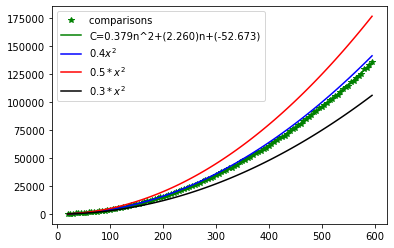

In [396]:
import random
import numpy as np
import math 
import matplotlib.pyplot as plt

def createIntArray(size, minVal, maxVal):
    return [random.randint(minVal, maxVal) for x in range(size)]

def dataToPlot(minSize=2, maxSize=100, step=1, runs=200, algorithm=processArray):
    totalC = []# An array to store the average comparisons for each array size
    
    i=0
    for n in range(minSize,maxSize, step):
        totalC.append(0);
        for j in range(runs):
            arr = createIntArray(n,-10000,10000)
            cmp = algorithm(arr,False)
            totalC[i]+= cmp
           
        totalC[i]=totalC[i]/runs;
        i+= 1
    return totalC

def plot_comparisons_and_moves(minSize, maxSize, step, runs, algorithm):
    C = dataToPlot(minSize, maxSize, step, runs, algorithm)

    x=[x for x in range(minSize, maxSize, step)]
    x2=[0.4*x*x for x in range(minSize, maxSize, step)]
    mx2=[0.5*x*x for x in range(minSize, maxSize, step)]
    mmx2=[0.3*x*x for x in range(minSize, maxSize, step)]

    Cfit = np.polyfit(x, C, 2)
    Cpoly = np.poly1d(Cfit)
    Ccoefs = "%.3fn^2+(%.3f)n+(%.3f)"%(Cfit[0],Cfit[1],Cfit[2])

    #print ("comparisons", Ccoefs)

   
    plt.plot(x, C, 'g*', label="comparisons ") 
    plt.plot(x, Cpoly(x), 'g-', label="C="+Ccoefs)
    plt.plot(x, x2, color="blue", label = "$0.4x^2$")
    plt.plot(x, mx2, color="red", label = "$0.5*x^2$")
    plt.plot(x, mmx2, color="black", label = "$0.3*x^2$")
    

    

    plt.legend()
    plt.show()
    
minSize = 20
maxSize = 600
step = 5
runs = 30
plot_comparisons_and_moves(minSize, maxSize, step, runs, processArray)

> **Answer:**

Therefore the complexity of the processArray algorithm in terms of comparisons is $\Theta (N^2)$ on average.

4) Demonstrate that the best-case complexity is better than quadratic through a contradiction (tip: show that it is **not** $\Omega(N^2)$). *Value: 10 points*

> **Answer:** We obtained that the complexity in the best case scenario was $2N - 3$. Let's show that it is not $\Omega (N^2)$ by contradiction:  

$\begin{aligned}
    \textrm{Let us assume that } f(N) = 2N - 3 \textrm{ belongs to } \Omega (N^2). \\
    \textrm{In that case, there exists positive constants } c_{1} \textrm{ and } N_{0} \textrm{ such that:} \\
    f(N) \geq c_{1}*N^2 \textrm{ for all } N > N_{0}\\
    => 2N - 3 \geq c_{1}*N^2 \textrm{ for all } N > N_{0} \\
    => c_{1}*N^2 - 2N + 3 \leq 0 \textrm{ for all } N > N_{0} \\
    \textrm{This is clearly impossible because it is a degree 2 polynomial for which the dominant factor is positive.}\\
    \textrm{This means that our hypothesis that } 2N - 3 \textrm{ belongs to } \Omega (N^2) \textrm{ is false.}\\
    \textrm{ Therefore the best-case complexity is better than quadratic.}
\end{aligned}$


-- --

**Section III**: Code the function isHeap(array, mx=True), which determines if an array is a heap. The second parameter "mx" indicates that the parent should be greater than the children if it is true, and if it is false, the parent should be smaller than its children. Also, test it for mx=True and mx=False. *Value: 10 points*

In [397]:
mx = True
factor = (-1)**(int(mx)+1)
print(factor)
mx = False
factor = (-1)**(int(mx)+1)
print(factor)

1
-1


In [398]:
def isHeap(array, mx=True):
    
    factor = (-1)**(int(mx)+1)
        
    index = 0
    
    while index in range(len(array)):
        
        if 2*index + 1 < len(array) and factor*array[2*index + 1] > factor*array[index]:
            return False
        elif 2*index + 2 < len(array) and factor*array[2*index + 2] > factor*array[index]:
            return False

        index = index + 1
    return True
    pass

In [399]:
# Testing, all should return True (do not modify these code lines)
print(isHeap([10,9,8,7,6,5,4,3,2,1],  True)   == True)
print(isHeap([10,8,9,6,7,4,5,2,3,1],  True)   == True)
print(isHeap([10,8,9,6,7,5,4,3,2,11], True)   == False) 
print(isHeap([10,6,9,4,8,7,5,3,2,1],  True)   == False)
print(isHeap([10,8,9,6,7,5,4,3,2,1],  False)  == False)
print(isHeap([1,2,3,4,5,6,7,8,9,10],  False)  == True)
print(isHeap([1,3,2,5,4,7,6,9,8,10],  False)  == True)
print(isHeap([1,3,2,5,4,7,6,9,8,0],   False)  == False)

True
True
True
True
True
True
True
True


-- --

**Section IV**: Perform the following considering the 2-3-4 tree algorithm seen in class: *Value 30 points*

a) Implement a recursive method searchValue(node, value) **that takes advantage of the structure of the BTree** to find the desired value. If it finds the value, return the index, or -1 if it doesn't find it. Base your code on what was covered in class. *Value: 10 points*.

In [400]:
def getPosition(node, value):
    for i in range(len(node.values)):
        if value < node.values[i]:
            return i
    
    return len(node.values)
        


class GNode:
    max_type = 4
    
    def __init__(self, value = None, index=None):
        self.values = []
        self.indexes = []
        self.children = []
        self.parent= None
        self.activeSplit = False
        if value is not None:
            self.values.append(value)
            self.indexes.append(index)
   
    def getType(self):
        return len(self.values)+1
    
    def isLeaf(self):
        return len(self.children)==0
    
    def insert(self, value, index):
        pos = getPosition(self, value)
        self.values.insert(pos,value)   
        self.indexes.insert(pos,index)
        return pos
    
    def getParent(self):
        return self.parent 
    
    def addChild(self, child):
        child.parent = self
        self.children.append(child)
    
    def addChildren(self, child1, child2, index):
        child1.parent = self
        child2.parent = self
        self.children[index]=child1
        self.children.insert(index+1, child2) 


def createBTree(arr, verbose = False):
    root = GNode(arr[0],0)
    for i in range(1, len(arr)):
        current = root
        while True:
            if current.getType() == GNode.max_type and \
            (current.activeSplit or current.isLeaf() ):
                current, root= split(current, root)
                if verbose:
                    printBTree(root)
                    print(i,"---------")
                
            elif current.isLeaf():
                    current.insert(arr[i], i)
                    break
            else:
                pos = getPosition(current, arr[i])
                current = current.children[pos]
    
    return root

def split(node, root):
    mid = len(node.values)//2       
    left = GNode()
    right = GNode()
    
    for i in range(mid):
        left.insert(node.values[i],node.indexes[i])
    for i in range(mid+1, len(node.values)):
        right.insert(node.values[i],node.indexes[i])  
    
    if not node.isLeaf():
        for i in range(mid+1):
            left.addChild(node.children[i])
        for i in range(mid+1,len(node.children)):
            right.addChild(node.children[i])
        
    if node == root:
        root = GNode(node.values[mid],node.indexes[mid])
        root.addChild(left)
        root.addChild(right)
        node = root
        return node, root
    
    else:
        parent:GNode = node.getParent()
        if parent.getType() == GNode.max_type:
            parent.activeSplit = True
            return parent, root
        else:
            index = parent.insert(node.values[mid], node.indexes[mid])
            parent.addChildren(left, right, index)
            node = parent #current
            return node, root
      

    


In [401]:
def printBTree(node, spaces=""):
    print("{}{}-{}".format(spaces, node.values, node.indexes))
    if node.isLeaf():
        return
    for child in node.children:
        printBTree(child, spaces+"\t")
    

arr = [*range(1,26,1)]
root = createBTree(arr)      
printBTree(root)  

[8]-[7]
	[4]-[3]
		[2]-[1]
			[1]-[0]
			[3]-[2]
		[6]-[5]
			[5]-[4]
			[7]-[6]
	[12, 16]-[11, 15]
		[10]-[9]
			[9]-[8]
			[11]-[10]
		[14]-[13]
			[13]-[12]
			[15]-[14]
		[18, 20, 22]-[17, 19, 21]
			[17]-[16]
			[19]-[18]
			[21]-[20]
			[23, 24, 25]-[22, 23, 24]


In [3]:
def searchValue(node: GNode, value):
    
    if node is None:
        return -1
    
    for i in range(len(node.values)):
        if value == node.values[i]:
            return node.indexes[i]
    
    if node.children == []:
        return -1
        
    
    right = 0
    RF = False
    for i in range(len(node.children)):
        if not RF:
            for j in range(len(node.children[i].values)):
                if value > node.children[i].values[j]:
                    right = i
                else:
                    right = i
                    RF = True
                    break
        else:
            break
            
    left = right
    LF = False
    for i in range(right, right - 2, - 1):
        if not LF:
            for j in range(len(node.children[i].values) - 1, -1, - 1):
                if value < node.children[i].values[j]:
                    left = i
                else:
                    left = i
                    LF = True
                    break
        else:
            break
    
    if left==right:
        new_node = node.children[left]
        return searchValue(new_node, value)
    else:
        left_node = node.children[left]
        l = searchValue(left_node, value)
        if l != -1:
            return l
        right_node = node.children[right]
        r = searchValue(right_node, value)
        if r != -1:
            return r
        if l == -1 and r == -1:
            return -1


for i in range(-1,27):
    print(searchValue(root, i), "\n")

-1 

-1 

[5] 

[12] 

-1 

-1 

[2] 

[0, 4, 14, 17] 

-1 

-1 

[8] 

-1 

-1 

-1 

-1 

-1 

-1 

-1 

-1 

-1 

-1 

-1 

-1 

-1 

[16] 

-1 

-1 

-1 



b) Make changes to store the indices of repeated values in the BTree, so that only the indices of these repeated elements are added, not the values themselves. In other words, for each value, there can be multiple indices. When printing the tree, also display the indices and show that the indices of repeated values are being stored. Highlight the changes by adding comments of the type "#CHANGE: change made" and test that it works. *Value: 20 points*

In [4]:
# Response, Copy the BTree code again, name it BTreeRepeated, and make the modifications here
# DO NOT FORGET TO ADD COMMENTS WHERE YOU MAKE CHANGES
def getPosition(node, value):
    for i in range(len(node.values)):
        if value <= node.values[i]:    # changed the < for a <= because we can now have repeated values 
            return i
    
    return len(node.values)
        


class GNode:
### We want to make it so that every element in the self.indexes list is a list.
### It can have one element if there is no repetitions for the value associated with that index, but it will always be a list.
    max_type = 4

    def __init__(self, value = None, index=None):
        self.values = []
        self.indexes = []
        self.children = []
        self.parent= None
        self.activeSplit = False
        if value is not None:
            self.values.append(value)
            self.indexes.append(index)
   
    def getType(self):
        return len(self.values)+1
    
    def isLeaf(self):
        return len(self.children)==0

### I changed the insert function from before into two separate functions.
### One will be called split_insert and it will be called whenever a split is called and it is the same as before
### The other will be called normal_insert and it will be called whenever we are adding an element to a node which isn't full.
### For the normal_insert function we have to check if it is a value that was already in the list or not, and act accordingly.

### I had to separate the split_insert function because otherwise each time there was a split, the index list for the value went inside another list.

    def normal_insert(self, value, index):
        pos = getPosition(self, value)
        if value in self.values:
            self.indexes[pos] = self.indexes[pos] + [index]
        else:   
            self.values.insert(pos,value)   
            self.indexes.insert(pos,[index])
        return pos
    
    def split_insert(self, value, index):
        pos = getPosition(self, value)
        self.values.insert(pos,value)
        self.indexes.insert(pos,index)
        return pos
        
    def getParent(self):
        return self.parent 
    
    def addChild(self, child):
        child.parent = self
        self.children.append(child)
    
    def addChildren(self, child1, child2, index):
        child1.parent = self
        child2.parent = self
        self.children[index]=child1
        self.children.insert(index+1, child2) 


def createBTreeRepeated(arr, verbose = False):
    root = GNode(arr[0],[0]) # I had to change the index parameter from 0 to [0] so that it would work the same as the rest of the indexes.
    for i in range(1, len(arr)):
        current = root
        while True:
            if current.getType() == GNode.max_type and \
            (current.activeSplit or current.isLeaf() ):
                current, root= split(current, root)
                if verbose:
                    printBTree(root)
                    print(i,"---------")
                
            elif current.isLeaf():
                    current.normal_insert(arr[i], i) # changed the insert function for normal_insert since we are just adding elements to a node that isn't full.
                    break
            else:
                pos = getPosition(current, arr[i])
                current = current.children[pos]
    
    return root

def split(node, root):
    mid = len(node.values)//2       
    left = GNode()
    right = GNode()
    
    for i in range(mid):
        left.split_insert(node.values[i],node.indexes[i]) #node.indexes[i] is already a list, so we just need to copy them and we use split_insert
    for i in range(mid+1, len(node.values)):
        right.split_insert(node.values[i],node.indexes[i]) #node.indexes[i] is already a list, so we just need to copy them and we use split_insert
    
    if not node.isLeaf():
        for i in range(mid+1):
            left.addChild(node.children[i])
        for i in range(mid+1,len(node.children)):
            right.addChild(node.children[i])
        
    if node == root:
        root = GNode(node.values[mid],node.indexes[mid])
        root.addChild(left)
        root.addChild(right)
        node = root
        return node, root
    
    else:
        parent:GNode = node.getParent()
        if parent.getType() == GNode.max_type:
            parent.activeSplit = True
            return parent, root
        else:
            index = parent.split_insert(node.values[mid], node.indexes[mid]) #node.indexes[i] is already a list, so we just need to copy them and we use split_insert
            parent.addChildren(left, right, index)
            node = parent #current
            return node, root

def printBTree(node, spaces=""):
    print("{}{}-{}".format(spaces, node.values, node.indexes))
    if node.isLeaf():
        return
    for child in node.children:
        printBTree(child, spaces+"\t")
    

arr = [*range(1,26,1)]
root = createBTreeRepeated(arr)      
printBTree(root)  

[8]-[[7]]
	[4]-[[3]]
		[2]-[[1]]
			[1]-[[0]]
			[3]-[[2]]
		[6]-[[5]]
			[5]-[[4]]
			[7]-[[6]]
	[12, 16]-[[11], [15]]
		[10]-[[9]]
			[9]-[[8]]
			[11]-[[10]]
		[14]-[[13]]
			[13]-[[12]]
			[15]-[[14]]
		[18, 20, 22]-[[17], [19], [21]]
			[17]-[[16]]
			[19]-[[18]]
			[21]-[[20]]
			[23, 24, 25]-[[22], [23], [24]]


In [5]:
# Test
arr = [6,-2,5,-2,6,1,32,55,9,88,107,107,2,45,6, 100,23,6]
# Print the tree with indices
root = createBTreeRepeated(arr,False)      
printBTree(root)  
# Search for values 6, -2, and 107 using searchValue
print("\n And here are the indexes for some repeated values :\n")
print("for 6 : ", searchValue(root, 6), "\n")
print("for -2 : ", searchValue(root, -2), "\n")
print("for 107 : ", searchValue(root, 107), "\n")

[32]-[[6]]
	[5, 9]-[[2], [8]]
		[-2, 1, 2]-[[1, 3], [5], [12]]
		[6]-[[0, 4, 14, 17]]
		[23]-[[16]]
	[88]-[[9]]
		[45, 55]-[[13], [7]]
		[100, 107]-[[15], [10, 11]]

 And here are the indexes for some repeated values :

for 6 :  [0, 4, 14, 17] 

for -2 :  [1, 3] 

for 107 :  [10, 11] 



-- --

**Section V**: The following recursive function constructs a fractal as shown in the figure. Design an equivalent iterative function called fractal_Iterative, based on what was taught in class. *Value: 25 points.*


<Figure size 432x288 with 0 Axes>

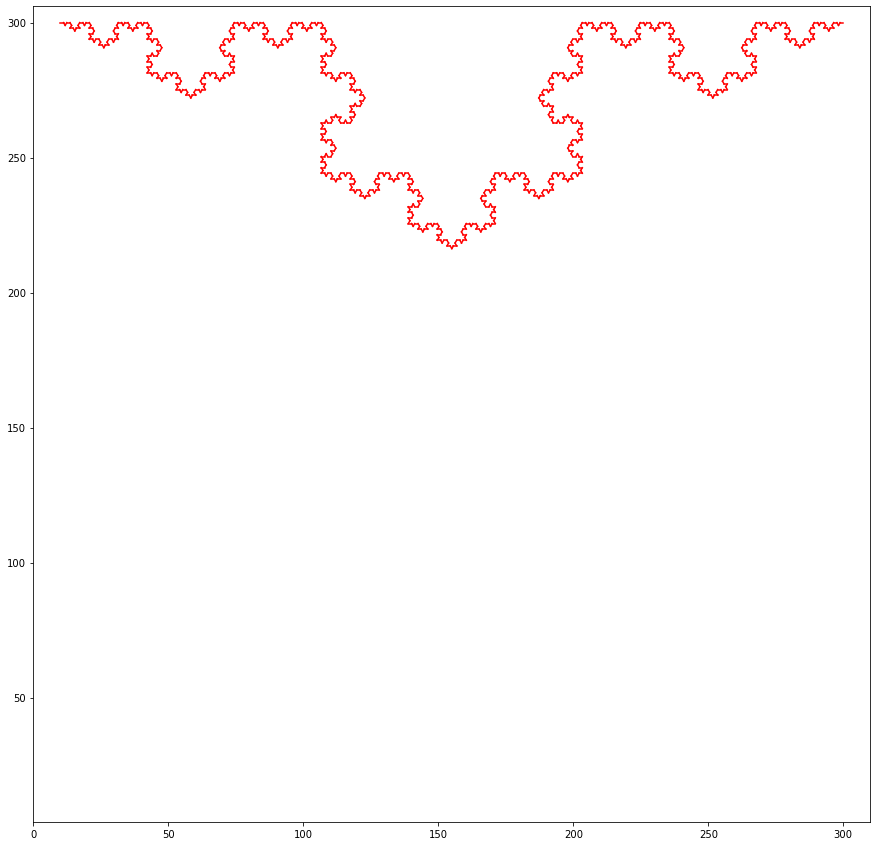

In [405]:
import numpy as np
import matplotlib.pyplot as plt
import math

sin60=math.sin(3.1415/3.0)
nivel=5

def fractal(i, xp12, yp12, xp22, yp22 ):  
    dx=(xp22-xp12)/3.0
    dy=(yp22-yp12)/3.0
    xx=xp12+3*dx/2.0-dy*sin60
    yy=yp12+3*dy/2.0+dx*sin60
    if(i<=0):
        t1=plt.Line2D([xp12,xp22],[yp12,yp22], color="red")
        plt.gca().add_line(t1)
    else:
        fractal(i-1,xp12,yp12,xp12+dx,yp12+dy)
        fractal(i-1,xp12+dx,yp12+dy,xx,yy)
        fractal(i-1,xx,yy,xp22-dx,yp22-dy)
        fractal(i-1,xp22-dx,yp22-dy,xp22,yp22)
plt.figure(1)
plt.clf()
plt.figure(figsize=(15,15))
plt.axis('equal')
axes = plt.gca()
axes.set_xlim([0,310])
axes.set_ylim([0,310])
fractal(nivel,300,300,10,300)

<Figure size 432x288 with 0 Axes>

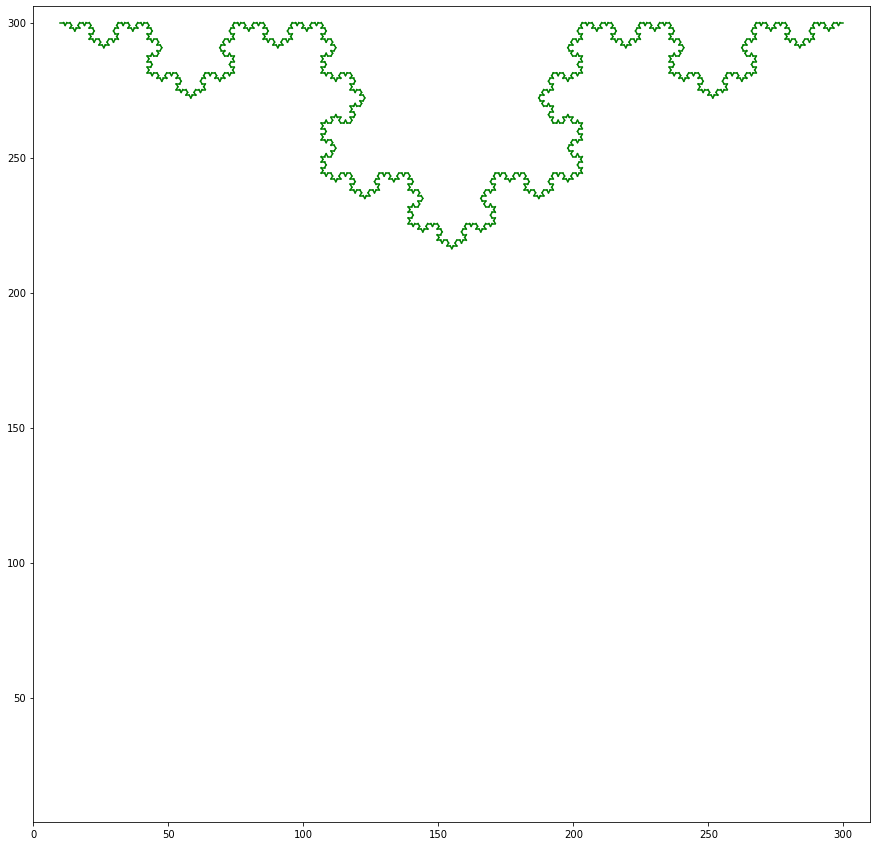

In [406]:
def fractal_Iterative_GF2(ilevels, ixp12, iyp12, ixp22, iyp22):
    
    stack = [(ilevels, ixp12, iyp12, ixp22, iyp22)]
    
    while stack:
        
        levels, xp12, yp12, xp22, yp22 = stack.pop()
        
        if levels <= 0:
            t1=plt.Line2D([xp12,xp22],[yp12,yp22], color="green")
            plt.gca().add_line(t1)
            continue
            
        dx=(xp22-xp12)/3.0
        dy=(yp22-yp12)/3.0
        xx=xp12+3*dx/2.0-dy*sin60
        yy=yp12+3*dy/2.0+dx*sin60
        
        stack.append((levels-1,xp12,yp12,xp12+dx,yp12+dy))
        stack.append((levels-1,xp12+dx,yp12+dy,xx,yy))
        stack.append((levels-1,xx,yy,xp22-dx,yp22-dy))
        stack.append((levels-1,xp22-dx,yp22-dy,xp22,yp22))
        
levels = 5
plt.figure(3)
plt.clf()
plt.figure(figsize=(15,15))
plt.axis('equal')
axes = plt.gca()
axes.set_xlim([0,310])
axes.set_ylim([0,310])
fractal_Iterative_GF2(levels,300,300,10,300)
plt.show()

        